In [ ]:
!pip install nltk

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from datetime import datetime
from google.colab import files

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# Download the 'punkt_tab' data package
nltk.download('punkt_tab') # This line downloads the necessary 'punkt_tab'

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Handle Missing Values
def handle_missing_values(df, columns):
    # Get the actual column names in the DataFrame
    actual_columns = df.columns.tolist()
    for col in columns:
        # Check if the column exists in the DataFrame before processing
        if col in actual_columns:
            df[col].fillna('Missing', inplace=True)
        else:
            print(f"Warning: Column '{col}' not found in DataFrame.")
    return df

# Text Cleaning
def clean_text(text):
    if not isinstance(text, str):
        return 'Missing'  # Handle non-string values
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    # Tokenize and remove stopwords
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply text cleaning to multiple columns
def clean_text_columns(df, columns):
    for col in columns:
        df[col] = df[col].apply(lambda x: clean_text(x))
    return df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Load train and test datasets
train_df = pd.read_csv("train.tsv", sep='\t')
test_df = pd.read_csv("test.tsv", sep='\t')

train_df

,Unnamed: 0,title,text,subject,date,label
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0
...,...,...,...,...,...,...
29995,6880,U.S. aerospace industry urges Trump to help Ex...,The chief executive of the U.S. Aerospace Indu...,politicsNews,"December 6, 2016",1
29996,17818,Highlights: Hong Kong leader Carrie Lam delive...,The following are highlights of the maiden pol...,worldnews,"October 11, 2017",1
29997,5689,Obama Literally LAUGHS At Claims That Brexit M...,If there s one thing President Barack Obama is...,News,"June 28, 2016",0
29998,15805,Syrian army takes full control of Deir al-Zor ...,The Syrian army and its allies have taken full...,worldnews,"November 2, 2017",1


In [ ]:
# Load train and test datasets
train_df = pd.read_csv("train.tsv", sep='\t')
test_df = pd.read_csv("test.tsv", sep='\t')

train_df

,Unnamed: 0,title,text,subject,date,label
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0
...,...,...,...,...,...,...
29995,6880,U.S. aerospace industry urges Trump to help Ex...,The chief executive of the U.S. Aerospace Indu...,politicsNews,"December 6, 2016",1
29996,17818,Highlights: Hong Kong leader Carrie Lam delive...,The following are highlights of the maiden pol...,worldnews,"October 11, 2017",1
29997,5689,Obama Literally LAUGHS At Claims That Brexit M...,If there s one thing President Barack Obama is...,News,"June 28, 2016",0
29998,15805,Syrian army takes full control of Deir al-Zor ...,The Syrian army and its allies have taken full...,worldnews,"November 2, 2017",1


In [ ]:
train_df['subject'] = train_df['subject'].replace({'politicsNews': 'politics'})
test_df['subject'] = test_df['subject'].replace({'politicsNews': 'politics'})

In [ ]:
unique_subjects = train_df['subject'].unique()
unique_subjects

array(['politics', 'Government News', 'left-news', 'worldnews', 'News',
       'Middle-east', 'US_News'], dtype=object)

In [ ]:
unique_subjects = test_df['subject'].unique()
unique_subjects

array(['News', 'politics', 'left-news', 'worldnews', 'Government News',
       'Middle-east', 'US_News'], dtype=object)

In [ ]:
print(train_df['subject'].value_counts())
test_df['subject'].value_counts()

subject
politics           12035
worldnews           6833
News                6099
left-news           2953
Government News     1014
US_News              536
Middle-east          530
Name: count, dtype: int64


,count
subject,
politics,3309
worldnews,1906
News,1713
left-news,750
Government News,292
US_News,149
Middle-east,148


In [ ]:
missing_subjects = train_df['subject'].isnull().sum()
print(f"Number of missing values in 'subject' column: {missing_subjects}")

Number of missing values in 'subject' column: 0


In [ ]:
missing_values_count = train_df.isnull().sum()
missing_values_count

,0
Unnamed: 0,0
title,0
text,0
subject,0
date,0
label,0


In [ ]:
missing_values_count = test_df.isnull().sum()
missing_values_count

,0
Unnamed: 0,0
title,0
text,0
subject,0
date,0
label,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'subject' column
train_df['subject_encoded'] = label_encoder.fit_transform(train_df['subject'])
test_df['subject_encoded'] = label_encoder.fit_transform(test_df['subject'])

# Print the mapping between original and encoded labels
subject_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Subject Mapping:")
print(subject_mapping)

# Now 'train_df['subject_encoded']' contains the numerical labels
print(train_df[['subject', 'subject_encoded']].head(20))
test_df[['subject', 'subject_encoded']].head(20)

Subject Mapping:
{'Government News': 0, 'Middle-east': 1, 'News': 2, 'US_News': 3, 'left-news': 4, 'politics': 5, 'worldnews': 6}
            subject  subject_encoded
0          politics                5
1   Government News                0
2          politics                5
3         left-news                4
4          politics                5
5         worldnews                6
6              News                2
7          politics                5
8          politics                5
9          politics                5
10         politics                5
11         politics                5
12         politics                5
13         politics                5
14        worldnews                6
15        worldnews                6
16         politics                5
17         politics                5
18        worldnews                6
19        worldnews                6


,subject,subject_encoded
0,News,2
1,politics,5
2,politics,5
3,politics,5
4,left-news,4
5,politics,5
6,politics,5
7,News,2
8,politics,5
9,News,2


In [ ]:
# Group data by 'subject' and 'label' and count occurrences
label_counts = train_df.groupby(['subject', 'label']).size().unstack(fill_value=0)

label_counts

label,0,1
subject,,
Government News,1014,0
Middle-east,530,0
News,6099,0
US_News,536,0
left-news,2953,0
politics,4346,7689
worldnews,0,6833


In [ ]:
# Group data by 'subject' and 'label' and count occurrences
label_counts = test_df.groupby(['subject', 'label']).size().unstack(fill_value=0)

label_counts

label,0,1
subject,,
Government News,292,0
Middle-east,148,0
News,1713,0
US_News,149,0
left-news,750,0
politics,1232,2077
worldnews,0,1906


In [ ]:
# Handle missing values in critical fields
critical_columns = ['title', 'text', 'subject', 'date', 'label', 'subject_encoded']
train_df = handle_missing_values(train_df, critical_columns)
test_df = handle_missing_values(test_df, critical_columns)

<ipython-input-2-7fce6c51ca8e>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Missing', inplace=True)


In [ ]:
# Split the 'date' column into separate columns
def split_date(df):
    if 'date' not in df.columns:
        print("Warning: 'date' column not found in DataFrame.")
        return df

    # Split the 'date' column based on spaces, ensuring 3 elements
    df[['month', 'day', 'year']] = df['date'].str.split(expand=True, n=2)  # Limit to 2 splits for 3 elements

    # Handle cases where there are fewer than 3 elements
    df['month'] = df['month'].fillna('Missing')
    df['day'] = df['day'].fillna('Missing')
    df['year'] = df['year'].fillna('Missing')

    return df

train_df = split_date(train_df)
test_df = split_date(test_df)

In [ ]:
train_df

,Unnamed: 0,title,text,subject,date,label,subject_encoded,month,day,year
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politics,"July 22, 2017",1,5,July,"22,",2017
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0,0,Jun,"19,",2017
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politics,"November 2, 2017",1,5,November,"2,",2017
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0,4,Sep,"17,",2016
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0,5,May,"26,",2017
...,...,...,...,...,...,...,...,...,...,...
29995,6880,U.S. aerospace industry urges Trump to help Ex...,The chief executive of the U.S. Aerospace Indu...,politics,"December 6, 2016",1,5,December,"6,",2016
29996,17818,Highlights: Hong Kong leader Carrie Lam delive...,The following are highlights of the maiden pol...,worldnews,"October 11, 2017",1,6,October,"11,",2017
29997,5689,Obama Literally LAUGHS At Claims That Brexit M...,If there s one thing President Barack Obama is...,News,"June 28, 2016",0,2,June,"28,",2016
29998,15805,Syrian army takes full control of Deir al-Zor ...,The Syrian army and its allies have taken full...,worldnews,"November 2, 2017",1,6,November,"2,",2017


In [ ]:
train_df['month'] = train_df['month'].str[:3]
test_df['month'] = test_df['month'].str[:3]

train_df['day'] = train_df['day'].str[:-1]
test_df['day'] = test_df['day'].str[:-1]

In [ ]:
def combine_date_columns(df):
    """Combines day, month, and year columns into a single datetime column."""
    if not all(col in df.columns for col in ['day', 'month', 'year']):
        print("Warning: 'day', 'month', or 'year' columns not found in DataFrame.")
        return df

    # Convert 'day' and 'year' to numeric, handling errors gracefully
    df['day'] = pd.to_numeric(df['day'], errors='coerce')
    df['year'] = pd.to_numeric(df['year'], errors='coerce')

    # Fill NaN values with 1 before converting to int
    df['day'] = df['day'].fillna(1).astype(int)
    df['year'] = df['year'].fillna(2000).astype(int)  # Replace with a reasonable default year

    # Create a combined date string
    df['combined_date_str'] = df['month'].astype(str) + ' ' + df['day'].astype(str) + ', ' + df['year'].astype(str)

    # Parse the combined date string into datetime objects, handling various formats
    formats = ["%b %d, %Y", "%B %d, %Y"]  # Example formats, add more as needed
    for fmt in formats:
        try:
            df['combined_date'] = pd.to_datetime(df['combined_date_str'], format=fmt, errors='coerce')
            # If successful, break out of the loop
            break
        except ValueError:
            pass  # Try the next format
    else:
        print("Warning: Could not parse dates with any of the specified formats.")

    return df

# Apply the function to your dataframes
train_df = combine_date_columns(train_df)
test_df = combine_date_columns(test_df)

In [ ]:
year_counts = train_df['year'].value_counts()
year_counts

,count
year,
2017,17329
2016,10980
2015,1660
2000,31


In [ ]:
# Drop rows where the 'year' column is 2000
train_df = train_df[train_df['year'] != 2000]
test_df = test_df[test_df['year'] != 2000]

In [ ]:
# Drop 'combined_date_str' and 'date' columns
train_df = train_df.drop(['combined_date_str', 'date'], axis=1)
test_df = test_df.drop(['combined_date_str', 'date'], axis=1)

# Rename 'combined_date' to 'date'
train_df = train_df.rename(columns={'combined_date': 'date'})
test_df = test_df.rename(columns={'combined_date': 'date'})

In [ ]:
train_df

,Unnamed: 0,title,text,subject,label,subject_encoded,month,day,year,date
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politics,1,5,Jul,22,2017,2017-07-22
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,0,0,Jun,19,2017,2017-06-19
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politics,1,5,Nov,2,2017,2017-11-02
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,0,4,Sep,17,2016,2016-09-17
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,0,5,May,26,2017,2017-05-26
...,...,...,...,...,...,...,...,...,...,...
29995,6880,U.S. aerospace industry urges Trump to help Ex...,The chief executive of the U.S. Aerospace Indu...,politics,1,5,Dec,6,2016,2016-12-06
29996,17818,Highlights: Hong Kong leader Carrie Lam delive...,The following are highlights of the maiden pol...,worldnews,1,6,Oct,11,2017,2017-10-11
29997,5689,Obama Literally LAUGHS At Claims That Brexit M...,If there s one thing President Barack Obama is...,News,0,2,Jun,28,2016,2016-06-28
29998,15805,Syrian army takes full control of Deir al-Zor ...,The Syrian army and its allies have taken full...,worldnews,1,6,Nov,2,2017,2017-11-02


In [ ]:
# Create 'month_label' column based on month abbreviations
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
train_df['month'] = train_df['month'].map(month_mapping)
test_df['month'] = test_df['month'].map(month_mapping)

# Ensure 'date' column is of datetime type
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

# Extract the day of the week and create 'day_of_week' column # This line is added
train_df['day_of_week'] = train_df['date'].dt.dayofweek
test_df['day_of_week'] = test_df['date'].dt.dayofweek

# Extract the day of the week and create 'is_weekend' flag
train_df['is_weekend'] = (train_df['day_of_week'] >= 5).astype(int)
test_df['is_weekend'] = (test_df['day_of_week'] >= 5).astype(int)

In [ ]:
# Drop specified columns
train_df = train_df.drop(['day'], axis=1, errors='ignore')
test_df = test_df.drop(['day'], axis=1, errors='ignore')

In [ ]:
train_df

,Unnamed: 0,title,text,subject,label,subject_encoded,month,year,date,day_of_week,is_weekend
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politics,1,5,7,2017,2017-07-22,5,1
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,0,0,6,2017,2017-06-19,0,0
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politics,1,5,11,2017,2017-11-02,3,0
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,0,4,9,2016,2016-09-17,5,1
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,0,5,5,2017,2017-05-26,4,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,6880,U.S. aerospace industry urges Trump to help Ex...,The chief executive of the U.S. Aerospace Indu...,politics,1,5,12,2016,2016-12-06,1,0
29996,17818,Highlights: Hong Kong leader Carrie Lam delive...,The following are highlights of the maiden pol...,worldnews,1,6,10,2017,2017-10-11,2,0
29997,5689,Obama Literally LAUGHS At Claims That Brexit M...,If there s one thing President Barack Obama is...,News,0,2,6,2016,2016-06-28,1,0
29998,15805,Syrian army takes full control of Deir al-Zor ...,The Syrian army and its allies have taken full...,worldnews,1,6,11,2017,2017-11-02,3,0


In [ ]:
# Drop specified columns
train_df = train_df.drop(['day_of_week'], axis=1, errors='ignore')
test_df = test_df.drop(['day_of_week'], axis=1, errors='ignore')

In [ ]:
# Group data by 'subject' and 'label' and count occurrences
label_counts = train_df.groupby(['subject_encoded', 'label']).size().unstack(fill_value=0)
label_counts2 = test_df.groupby(['subject_encoded', 'label']).size().unstack(fill_value=0)

print(label_counts)
label_counts2

label               0     1
subject_encoded            
0                1012     0
1                 530     0
2                6099     0
3                 536     0
4                2951     0
5                4319  7689
6                   0  6833


label,0,1
subject_encoded,,
0,292,0
1,148,0
2,1713,0
3,149,0
4,749,0
5,1224,2077
6,0,1906


Too much biased distribution in both test and train data based on subject.

In [ ]:
# Group data by 'year' and 'label' and count occurrences
label_counts = train_df.groupby(['year', 'label']).size().unstack(fill_value=0)

label_counts

label,0,1
year,,
2015,1660,0
2016,7722,3258
2017,6065,11264


In [ ]:
label_counts = test_df.groupby(['year', 'label']).size().unstack(fill_value=0)

label_counts

label,0,1
year,,
2015,455,0
2016,2179,832
2017,1641,3151


In [ ]:
""" 2015 all data fake """

# Drop rows where the year is 2015
train_df = train_df[train_df['year'] != 2015]
test_df = test_df[test_df['year'] != 2015]

In [ ]:
label_counts = test_df.groupby(['month', 'label']).size().unstack(fill_value=0)

label_counts

label,0,1
month,,
1,368,186
2,336,164
3,374,212
4,321,192
5,397,174
6,304,155
7,342,176
8,270,172
9,270,647


In [ ]:
label_counts = train_df.groupby(['is_weekend', 'label']).size().unstack(fill_value=0)

label_counts

label,0,1
is_weekend,,
0,10244,12756
1,3543,1766


In [ ]:
label_counts = test_df.groupby(['is_weekend', 'label']).size().unstack(fill_value=0)

label_counts

label,0,1
is_weekend,,
0,2830,3477
1,990,506


In [ ]:
# Clean textual data
text_columns = ['title', 'text']  # Include 'Subject' for cleaning
train_df = clean_text_columns(train_df, text_columns)
test_df = clean_text_columns(test_df, text_columns)

# Save preprocessed data to new files
train_df.to_csv("preprocessed_train.tsv", sep='\t', index=False)
test_df.to_csv("preprocessed_test.tsv", sep='\t', index=False)

print("Preprocessed Train Data saved as 'preprocessed_train.tsv'")
print("Preprocessed Test Data saved as 'preprocessed_test.tsv'")

# Display preprocessed data
print("\nPreprocessed Train Data Sample:")
print(train_df.head())
print("\nPreprocessed Test Data Sample:")
print(test_df.head())

Preprocessed Train Data saved as 'preprocessed_train.tsv'
Preprocessed Test Data saved as 'preprocessed_test.tsv'

Preprocessed Train Data Sample:
   Unnamed: 0                                              title  \
0        2619  excia head say trump remark russia interferenc...   
1       16043  wont believe punishment hispanic store owner s...   
2         876   federal reserve governor powell policy view word   
3       19963  scoundrel hillary supporter start trumpleaks c...   
4       10783  nancy pelosi arrogantly dismisses question cro...   

                                                text          subject  label  \
0  former cia director john brennan friday critic...         politics      1   
1  man come store information much fraudster exce...  Government News      0   
2  president donald trump thursday tapped federal...         politics      1   
3  hillary clinton ally david brock offering pay ...        left-news      0   
4  pleading ignorance perfect ploy nancy pel

In [ ]:
train_df

,Unnamed: 0,title,text,subject,label,subject_encoded,month,year,date,is_weekend
0,2619,excia head say trump remark russia interferenc...,former cia director john brennan friday critic...,politics,1,5,7,2017,2017-07-22,1
1,16043,wont believe punishment hispanic store owner s...,man come store information much fraudster exce...,Government News,0,0,6,2017,2017-06-19,0
2,876,federal reserve governor powell policy view word,president donald trump thursday tapped federal...,politics,1,5,11,2017,2017-11-02,0
3,19963,scoundrel hillary supporter start trumpleaks c...,hillary clinton ally david brock offering pay ...,left-news,0,4,9,2016,2016-09-17,1
4,10783,nancy pelosi arrogantly dismisses question cro...,pleading ignorance perfect ploy nancy pelosi b...,politics,0,5,5,2017,2017-05-26,0
...,...,...,...,...,...,...,...,...,...,...
29995,6880,u aerospace industry urge trump help exim bank...,chief executive u aerospace industry associati...,politics,1,5,12,2016,2016-12-06,0
29996,17818,highlight hong kong leader carrie lam delivers...,following highlight maiden policy address hong...,worldnews,1,6,10,2017,2017-10-11,0
29997,5689,obama literally laugh claim brexit mean trump ...,one thing president barack obama threatened do...,News,0,2,6,2016,2016-06-28,0
29998,15805,syrian army take full control deir alzor islam...,syrian army ally taken full control deir alzor...,worldnews,1,6,11,2017,2017-11-02,0


In [ ]:
weekend_label_distribution = train_df.groupby(['is_weekend', 'label']).size().unstack(fill_value=0)
weekend_label_distribution

label,0,1
is_weekend,,
0,10244,12756
1,3543,1766


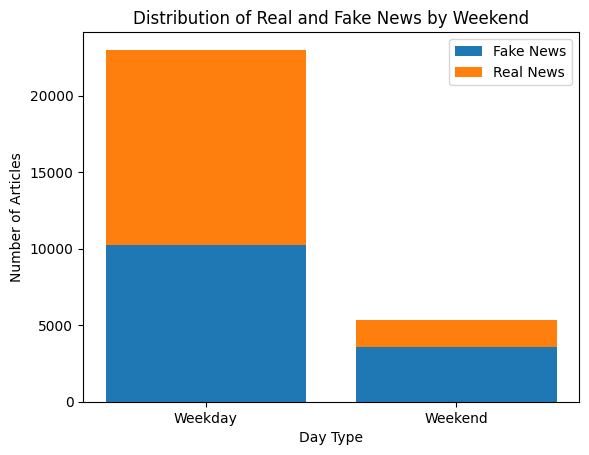

In [ ]:
# @title Distribution of Real and Fake News by Weekend

import matplotlib.pyplot as plt

# Create a stacked bar chart
plt.bar([0, 1], weekend_label_distribution[0], label='Fake News')
plt.bar([0, 1], weekend_label_distribution[1], bottom=weekend_label_distribution[0], label='Real News')

# Customize the chart
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.xlabel('Day Type')
plt.ylabel('Number of Articles')
plt.title('Distribution of Real and Fake News by Weekend')
_ = plt.legend()

In [ ]:
weekend_label_distribution = test_df.groupby(['is_weekend', 'label']).size().unstack(fill_value=0)
weekend_label_distribution

label,0,1
is_weekend,,
0,2830,3477
1,990,506


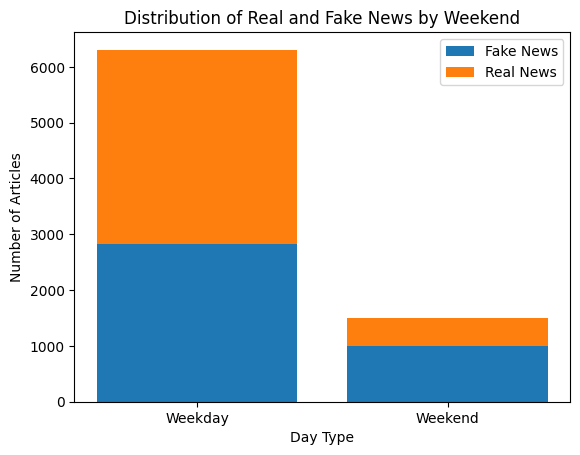

In [ ]:
# Create a stacked bar chart
plt.bar([0, 1], weekend_label_distribution[0], label='Fake News')
plt.bar([0, 1], weekend_label_distribution[1], bottom=weekend_label_distribution[0], label='Real News')

# Customize the chart
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.xlabel('Day Type')
plt.ylabel('Number of Articles')
plt.title('Distribution of Real and Fake News by Weekend')
_ = plt.legend()

Weekends are more prone to fake news.

In [ ]:
# Group data by month and label, then count occurrences
monthly_label_distribution = train_df.groupby(['month', 'label']).size().unstack(fill_value=0)
monthly_label_distribution

label,0,1
month,,
1,1384,683
2,1286,717
3,1373,808
4,1198,628
5,1179,609
6,1135,685
7,1080,575
8,1186,625
9,1062,2294


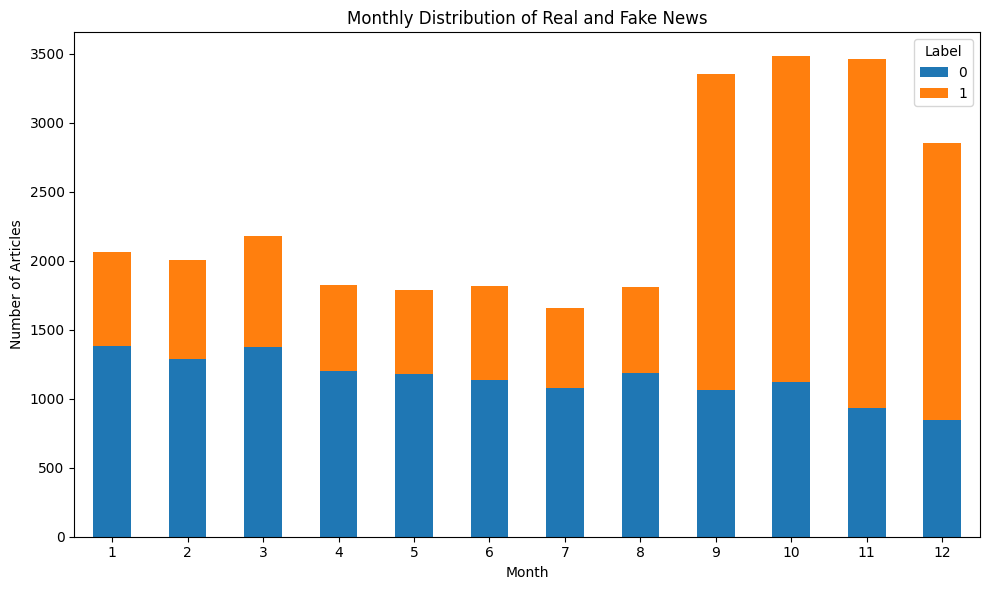

In [ ]:
# Create the plot
monthly_label_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Monthly Distribution of Real and Fake News')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Label')  # Add a legend
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# Group data by month and label, then count occurrences
monthly_label_distribution = test_df.groupby(['month', 'label']).size().unstack(fill_value=0)
monthly_label_distribution

label,0,1
month,,
1,368,186
2,336,164
3,374,212
4,321,192
5,397,174
6,304,155
7,342,176
8,270,172
9,270,647


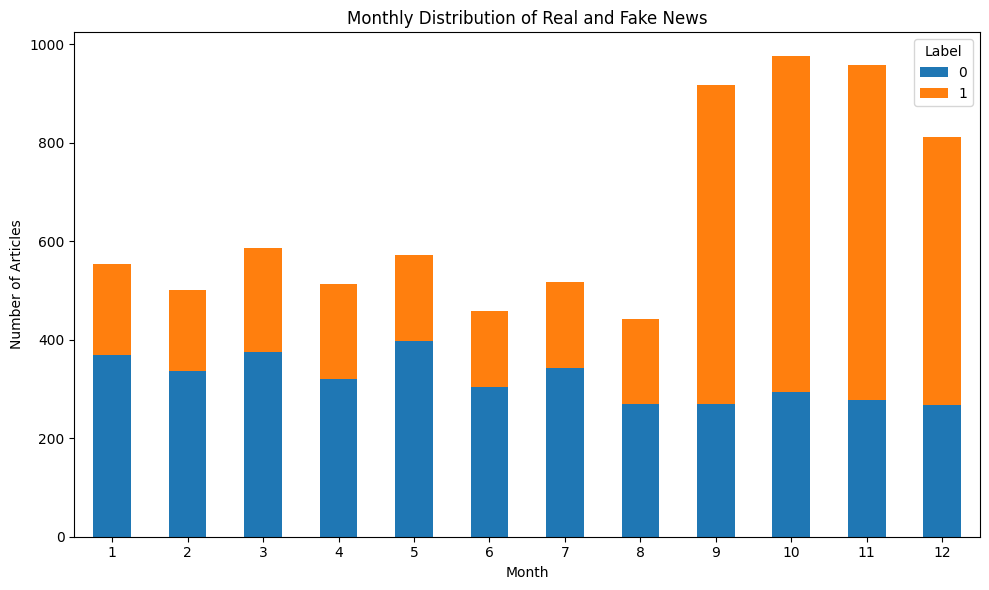

In [ ]:
# Create the plot
monthly_label_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Monthly Distribution of Real and Fake News')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Label')  # Add a legend
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

First 8 months (Jan - Aug) hoghly prone to fake news as a percentage of whole.

In [ ]:
# Group data by month and label, then count occurrences
subject_label_distribution = train_df.groupby(['subject', 'label']).size().unstack(fill_value=0)
subject_label_distribution

label,0,1
subject,,
Government News,620,0
Middle-east,530,0
News,6099,0
US_News,536,0
left-news,2445,0
politics,3557,7689
worldnews,0,6833


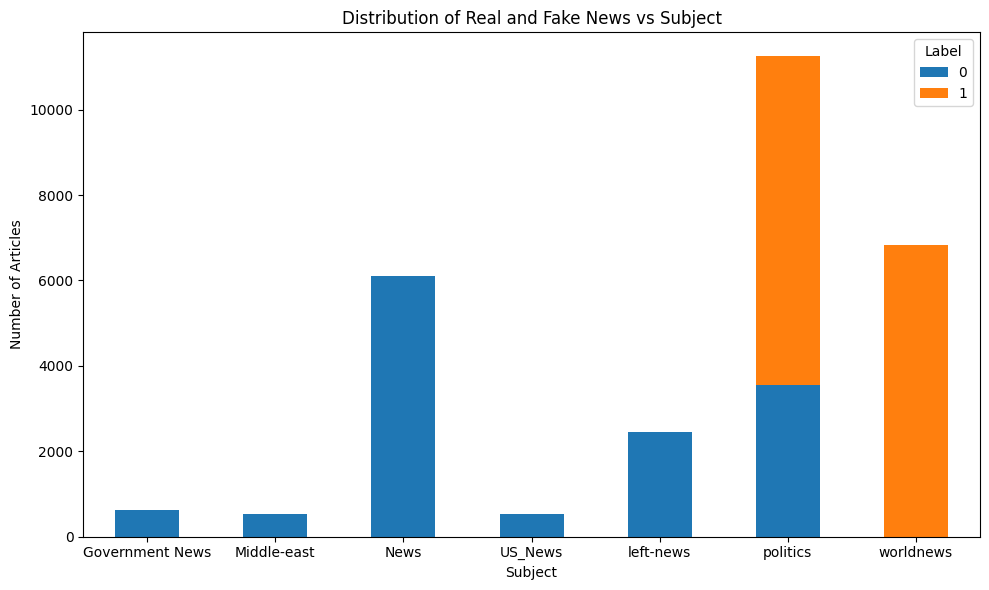

In [ ]:
# Create the plot
subject_label_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Distribution of Real and Fake News vs Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Label')  # Add a legend
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 464.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.3 MB/s eta 0:00:00


In [ ]:
# Import additional libraries for feature engineering
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import OneHotEncoder
import textstat

# 1. Title Features
def extract_title_features(df):
    df['title_char_count'] = df['title'].apply(len)  # Character count
    df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))  # Word count
    df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)  # Sentiment score
    sensational_keywords = ['breaking', 'shocking', 'urgent', 'exclusive']
    df['title_keyword_density'] = df['title'].apply(
        lambda x: sum([x.lower().count(word) for word in sensational_keywords]) / len(x.split()) if len(x.split()) > 0 else 0
    )  # Keyword density
    return df

# 2. Text Features
def extract_text_features(df):
    df['text_word_count'] = df['text'].apply(lambda x: len(x.split()))  # Word count
    df['text_sentence_count'] = df['text'].apply(lambda x: len(re.split(r'[.!?]', x)))  # Sentence count
    df['text_sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)  # Sentiment score
    df['text_readability_score'] = df['text'].apply(textstat.flesch_reading_ease)  # Readability score
    return df

# Topic Modeling with LDA
def perform_topic_modeling(df, column, n_topics=5, top_words=10):
    """
    Performs topic modeling and extracts top words for each topic.

    Args:
        df: DataFrame with text data.
        column: Name of the text column.
        n_topics: Number of topics to extract.
        top_words: Number of top words to display for each topic.

    Returns:
        df: DataFrame with added topic columns.
        lda: Trained LDA model.
        topic_words: List of lists containing top words for each topic.
    """

    vectorizer = CountVectorizer(stop_words='english', max_features=5000)
    dt_matrix = vectorizer.fit_transform(df[column])
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dt_matrix)
    topics = lda.transform(dt_matrix)

    # Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Extract top words for each topic
    topic_words = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[:-top_words - 1:-1]  # Get indices of top words
        top_words_for_topic = [feature_names[i] for i in top_words_idx]
        topic_words.append(top_words_for_topic)

    # Add topic columns to DataFrame
    for i in range(n_topics):
        df[f'topic_{i+1}'] = topics[:, i]

    return df, lda, topic_words

# Reload preprocessed datasets
train_df = pd.read_csv("preprocessed_train.tsv", sep='\t')
test_df = pd.read_csv("preprocessed_test.tsv", sep='\t')

# Title Features
train_df = extract_title_features(train_df)
test_df = extract_title_features(test_df)

# Text Features
train_df = extract_text_features(train_df)
test_df = extract_text_features(test_df)

# Topic Modeling (on 'text' column)
train_df, lda_model, topic_top_words = perform_topic_modeling(train_df, 'text', n_topics=5)
test_df, _, test_topic_top_words = perform_topic_modeling(test_df, 'text', n_topics=5)

# Save Feature-Engineered Data
train_df.to_csv("engineered_train.tsv", sep='\t', index=False)
test_df.to_csv("engineered_test.tsv", sep='\t', index=False)

print("Feature-Engineered Train Data saved as 'engineered_train.tsv'")
print("Feature-Engineered Test Data saved as 'engineered_test.tsv'")

Feature-Engineered Train Data saved as 'engineered_train.tsv'
Feature-Engineered Test Data saved as 'engineered_test.tsv'


In [ ]:
train_df

,Unnamed: 0,title,text,subject,label,subject_encoded,month,year,date,is_weekend,...,title_keyword_density,text_word_count,text_sentence_count,text_sentiment,text_readability_score,topic_1,topic_2,topic_3,topic_4,topic_5
0,2619,excia head say trump remark russia interferenc...,former cia director john brennan friday critic...,politics,1,5,7,2017,2017-07-22,1,...,0.0,248,1,-0.050770,-214.09,0.128188,0.001000,0.001002,0.868799,0.001011
1,16043,wont believe punishment hispanic store owner s...,man come store information much fraudster exce...,Government News,0,0,6,2017,2017-06-19,0,...,0.0,247,1,0.086019,-204.62,0.001218,0.995160,0.001196,0.001205,0.001221
2,876,federal reserve governor powell policy view word,president donald trump thursday tapped federal...,politics,1,5,11,2017,2017-11-02,0,...,0.0,377,1,0.042708,-353.49,0.000755,0.350829,0.000741,0.000740,0.646935
3,19963,scoundrel hillary supporter start trumpleaks c...,hillary clinton ally david brock offering pay ...,left-news,0,4,9,2016,2016-09-17,1,...,0.0,106,1,0.215909,-61.50,0.841721,0.151332,0.002308,0.002319,0.002320
4,10783,nancy pelosi arrogantly dismisses question cro...,pleading ignorance perfect ploy nancy pelosi b...,politics,0,5,5,2017,2017-05-26,0,...,0.0,98,1,0.130000,-61.84,0.349206,0.107524,0.002789,0.537678,0.002804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28304,6880,u aerospace industry urge trump help exim bank...,chief executive u aerospace industry associati...,politics,1,5,12,2016,2016-12-06,0,...,0.0,76,1,0.129966,-39.51,0.003505,0.451570,0.003512,0.003559,0.537854
28305,17818,highlight hong kong leader carrie lam delivers...,following highlight maiden policy address hong...,worldnews,1,6,10,2017,2017-10-11,0,...,0.0,243,1,0.033056,-209.02,0.001021,0.570729,0.107596,0.001019,0.319635
28306,5689,obama literally laugh claim brexit mean trump ...,one thing president barack obama threatened do...,News,0,2,6,2016,2016-06-28,0,...,0.0,204,1,0.123423,-160.97,0.497979,0.001305,0.001308,0.001302,0.498106
28307,15805,syrian army take full control deir alzor islam...,syrian army ally taken full control deir alzor...,worldnews,1,6,11,2017,2017-11-02,0,...,0.0,211,1,0.076923,-159.62,0.001143,0.001151,0.995406,0.001149,0.001150


In [ ]:
train_df['title_sentiment']

,title_sentiment
0,0.0000
1,0.5000
2,0.0000
3,0.0000
4,0.0000
...,...
28304,0.0000
28305,0.0000
28306,0.2625
28307,0.3500


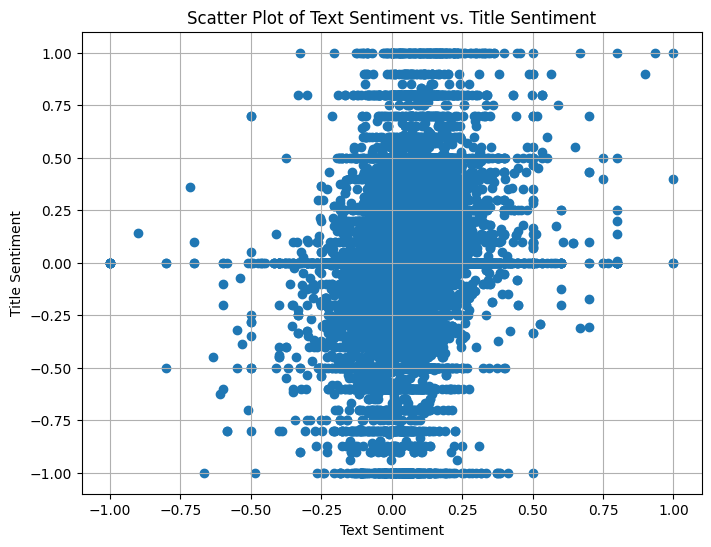

In [ ]:
# Assuming your dataframe is named 'train_df'
plt.figure(figsize=(8, 6))
plt.scatter(train_df['text_sentiment'], train_df['title_sentiment'])
plt.xlabel('Text Sentiment')
plt.ylabel('Title Sentiment')
plt.title('Scatter Plot of Text Sentiment vs. Title Sentiment')
plt.grid(True)
plt.show()

In [ ]:
train_df[['text_sentiment', 'title_sentiment']]

,text_sentiment,title_sentiment
0,-0.050770,0.0000
1,0.086019,0.5000
2,0.042708,0.0000
3,0.215909,0.0000
4,0.130000,0.0000
...,...,...
28304,0.129966,0.0000
28305,0.033056,0.0000
28306,0.123423,0.2625
28307,0.076923,0.3500


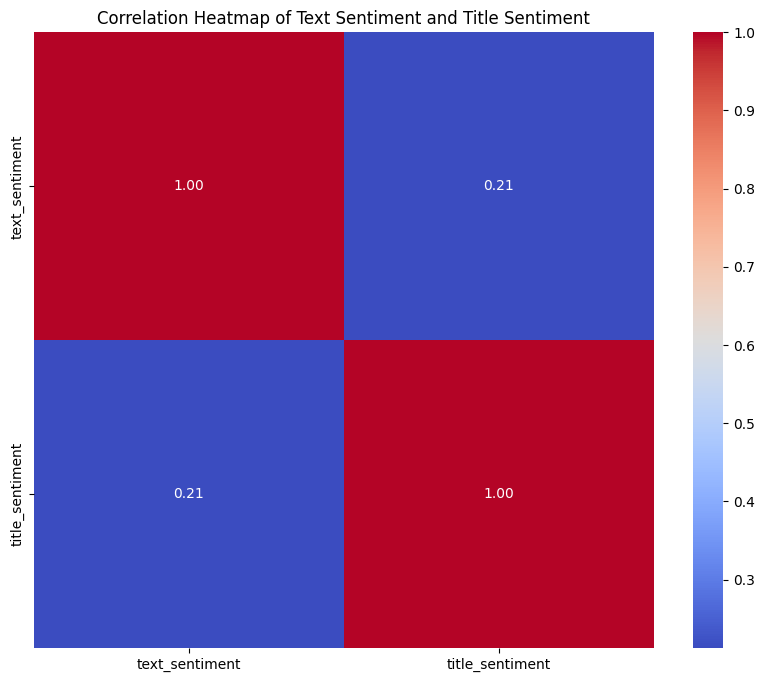

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(train_df[['text_sentiment', 'title_sentiment']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Text Sentiment and Title Sentiment')
plt.show()

Title sentiment is not strongly correlated with text sentiment which does not give any conclusive evidence.

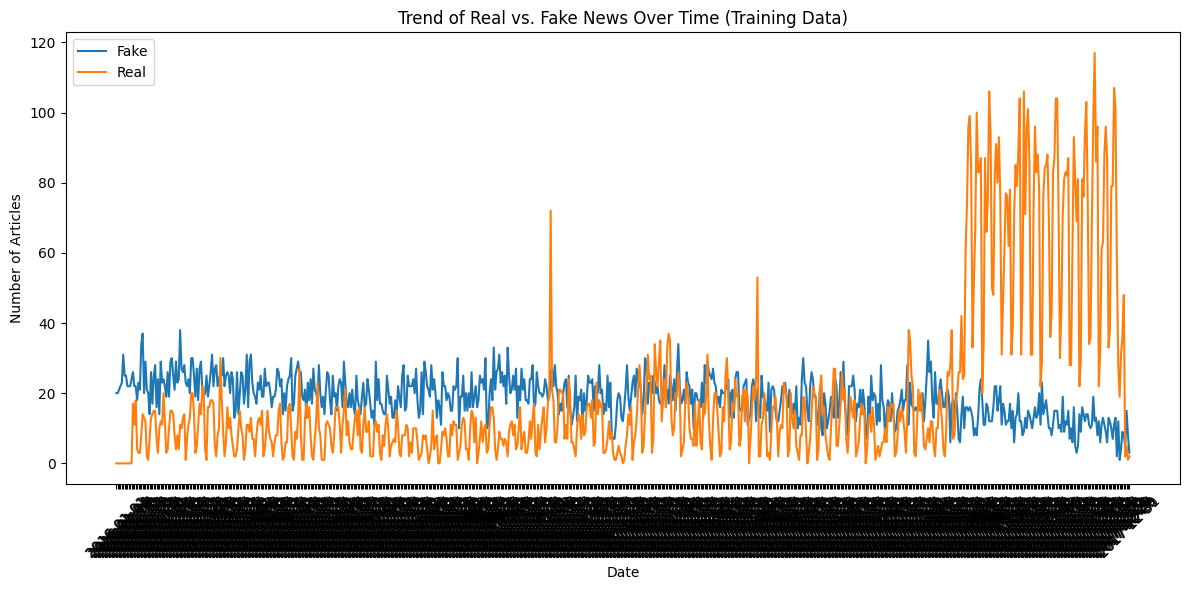

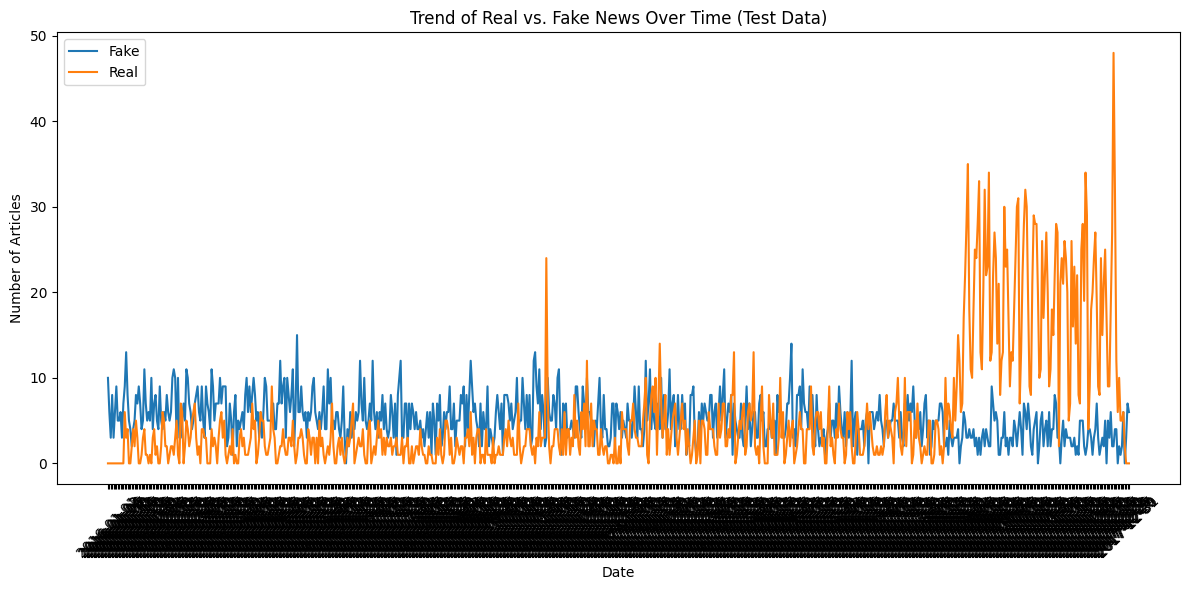

In [ ]:
import matplotlib.pyplot as plt

# Group data by date and label, then count occurrences
date_label_distribution_train = train_df.groupby(['date', 'label']).size().unstack(fill_value=0)
date_label_distribution_test = test_df.groupby(['date', 'label']).size().unstack(fill_value=0)


# Plotting for training data
plt.figure(figsize=(12, 6))
plt.plot(date_label_distribution_train.index, date_label_distribution_train[0], label='Fake')
plt.plot(date_label_distribution_train.index, date_label_distribution_train[1], label='Real')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Trend of Real vs. Fake News Over Time (Training Data)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting for test data
plt.figure(figsize=(12, 6))
plt.plot(date_label_distribution_test.index, date_label_distribution_test[0], label='Fake')
plt.plot(date_label_distribution_test.index, date_label_distribution_test[1], label='Real')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Trend of Real vs. Fake News Over Time (Test Data)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Amount of fake news remais same over the year, although the ratio of fake news to real news decreases.

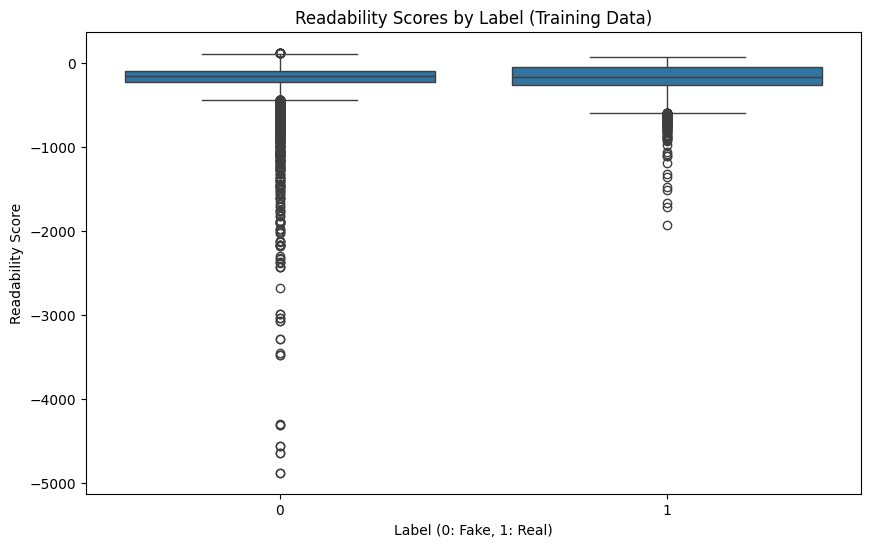

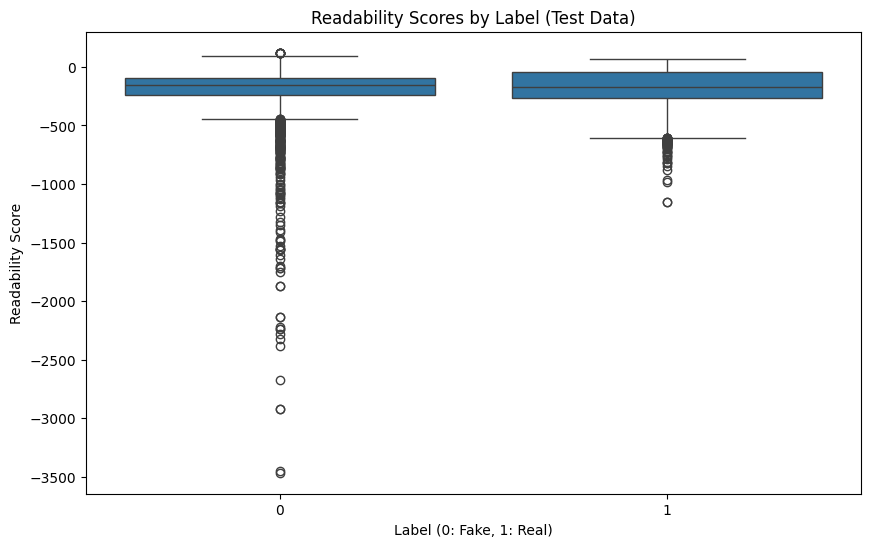

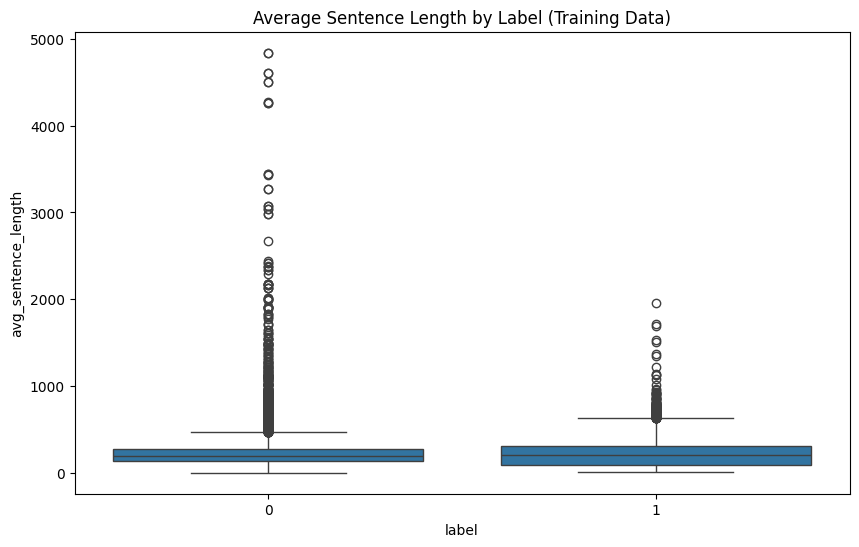

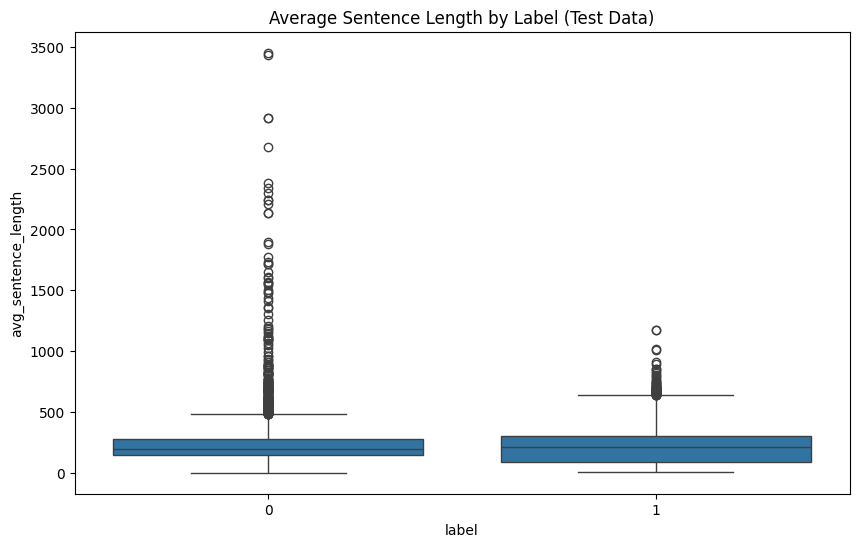

In [ ]:
# @title Readability score and Avergae Sentence length comparison

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_df and test_df are already loaded and preprocessed

# Calculate readability scores
train_df['readability_score'] = train_df['text'].apply(textstat.flesch_reading_ease)
test_df['readability_score'] = test_df['text'].apply(textstat.flesch_reading_ease)


# Boxplot comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='readability_score', data=train_df)
plt.title('Readability Scores by Label (Training Data)')
plt.xlabel('Label (0: Fake, 1: Real)')
plt.ylabel('Readability Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='readability_score', data=test_df)
plt.title('Readability Scores by Label (Test Data)')
plt.xlabel('Label (0: Fake, 1: Real)')
plt.ylabel('Readability Score')
plt.show()


#Further analysis (example: sentence length)
train_df['avg_sentence_length'] = train_df['text'].apply(lambda x: sum(len(s.split()) for s in re.split(r'[.!?]', x)) / len(re.split(r'[.!?]', x)) if len(re.split(r'[.!?]', x)) > 0 else 0)
test_df['avg_sentence_length'] = test_df['text'].apply(lambda x: sum(len(s.split()) for s in re.split(r'[.!?]', x)) / len(re.split(r'[.!?]', x)) if len(re.split(r'[.!?]', x)) > 0 else 0)

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='avg_sentence_length', data=train_df)
plt.title('Average Sentence Length by Label (Training Data)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='avg_sentence_length', data=test_df)
plt.title('Average Sentence Length by Label (Test Data)')
plt.show()

1. Not much difference in readability scores and average lengths of the text.
2. Although it can be seen that fake news labe has many outliers showing inconsistency in the writting skills.
3. Real news are a bit complex and have a bit longer text lengths.

In [ ]:
# @title Part of Speech analysis (Fake news vs Real news)

import nltk
nltk.download('averaged_perceptron_tagger_eng') # Download the necessary data package

def extract_linguistic_features(df):
    """
    Extracts linguistic features from text data.

    Args:
        df: DataFrame with 'title' and 'text' columns.

    Returns:
        DataFrame with added linguistic features.
    """

    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def process_text(text):
        words = word_tokenize(text.lower())
        words = [lemmatizer.lemmatize(w) for w in words if w.isalnum() and w not in stop_words]
        return words

    df['title_words'] = df['title'].apply(process_text)
    df['text_words'] = df['text'].apply(process_text)

    # Word Frequency
    df['title_word_freq'] = df['title_words'].apply(lambda x: nltk.FreqDist(x))
    df['text_word_freq'] = df['text_words'].apply(lambda x: nltk.FreqDist(x))

    # Most Frequent Words
    df['title_most_common'] = df['title_word_freq'].apply(lambda x: x.most_common(5)) # Top 5
    df['text_most_common'] = df['text_word_freq'].apply(lambda x: x.most_common(5)) # Top 5

    # Part-of-Speech Tagging
    df['title_pos_tags'] = df['title_words'].apply(lambda x: nltk.pos_tag(x))
    df['text_pos_tags'] = df['text_words'].apply(lambda x: nltk.pos_tag(x))


    return df

# Example usage (assuming train_df and test_df are already loaded):
train_df = extract_linguistic_features(train_df)
test_df = extract_linguistic_features(test_df)

#Further analysis (example: POS tag distribution)
def pos_tag_analysis(df):
  pos_counts = {}

  for pos_list in df['text_pos_tags']:
      for word, pos in pos_list:
          if pos in pos_counts:
              pos_counts[pos] += 1
          else:
              pos_counts[pos] = 1

  sorted_pos_counts = dict(sorted(pos_counts.items(), key=lambda item: item[1], reverse=True))
  print("Text POS tag frequency distribution")
  print(sorted_pos_counts)

pos_tag_analysis(train_df)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Text POS tag frequency distribution
{'NN': 3079349, 'JJ': 1347293, 'VBD': 466280, 'RB': 307368, 'VBG': 289354, 'VBN': 171563, 'VBP': 169123, 'VB': 139613, 'NNS': 127835, 'IN': 119003, 'CD': 72531, 'MD': 70113, 'VBZ': 39756, 'JJS': 20998, 'JJR': 19446, 'NNP': 15306, 'RBR': 12730, 'DT': 12242, 'FW': 8696, 'RP': 5066, 'CC': 3538, 'WP$': 2357, 'WP': 1477, 'WDT': 1304, 'RBS': 767, 'WRB': 749, 'PRP': 668, 'TO': 519, 'UH': 480, 'PRP$': 199, 'EX': 116, 'POS': 94, 'PDT': 24, 'NNPS': 15, 'SYM': 6, '$': 5, "''": 3}


In [ ]:
# @title POS tags in table form

import pandas as pd

def pos_tag_analysis(df):
  pos_counts = {}

  for pos_list in df['text_pos_tags']:
      for word, pos in pos_list:
          if pos in pos_counts:
              pos_counts[pos] += 1
          else:
              pos_counts[pos] = 1

  sorted_pos_counts = dict(sorted(pos_counts.items(), key=lambda item: item[1], reverse=True))

  # Create a DataFrame for better visualization
  pos_df = pd.DataFrame(list(sorted_pos_counts.items()), columns=['POS Tag', 'Frequency'])
  print(pos_df)

pos_tag_analysis(train_df)

   POS Tag  Frequency
0       NN    3079349
1       JJ    1347293
2      VBD     466280
3       RB     307368
4      VBG     289354
5      VBN     171563
6      VBP     169123
7       VB     139613
8      NNS     127835
9       IN     119003
10      CD      72531
11      MD      70113
12     VBZ      39756
13     JJS      20998
14     JJR      19446
15     NNP      15306
16     RBR      12730
17      DT      12242
18      FW       8696
19      RP       5066
20      CC       3538
21     WP$       2357
22      WP       1477
23     WDT       1304
24     RBS        767
25     WRB        749
26     PRP        668
27      TO        519
28      UH        480
29    PRP$        199
30      EX        116
31     POS         94
32     PDT         24
33    NNPS         15
34     SYM          6
35       $          5
36      ''          3


In [ ]:
# @title Separate pos analysis for fake and real news

import nltk
import pandas as pd

def pos_tag_analysis_by_label(df):
    """
    Performs POS tag analysis separately for fake and real news.
    """
    nltk.download('averaged_perceptron_tagger_eng', quiet=True)

    # Group data by label
    fake_news = df[df['label'] == 0]
    real_news = df[df['label'] == 1]

    def analyze_pos_tags(news_df):
        pos_counts = {}
        for pos_list in news_df['text_pos_tags']:
            for word, pos in pos_list:
                if pos in pos_counts:
                    pos_counts[pos] += 1
                else:
                    pos_counts[pos] = 1

        return pos_counts

    fake_pos = analyze_pos_tags(fake_news)
    real_pos = analyze_pos_tags(real_news)

    # Convert to dataframes for better visualization
    fake_pos_df = pd.DataFrame(list(fake_pos.items()), columns=['POS Tag', 'Frequency'])
    real_pos_df = pd.DataFrame(list(real_pos.items()), columns=['POS Tag', 'Frequency'])

    print("POS Tag Analysis for Fake News:")
    print(fake_pos_df)

    print("\nPOS Tag Analysis for Real News:")
    print(real_pos_df)

# Assuming 'train_df' is your DataFrame
pos_tag_analysis_by_label(train_df)

POS Tag Analysis for Fake News:
   POS Tag  Frequency
0       NN    1511125
1       VB      70496
2       JJ     662308
3       IN      66491
4      VBG     153696
5      NNS      68371
6      VBP      99596
7      VBD     205962
8       CD      33939
9       RB     184370
10     JJR       9542
11      MD      29983
12     VBZ      23395
13     VBN      87702
14      FW       4466
15     NNP       6637
16     RBR       6265
17     JJS      10422
18      DT       8151
19      CC       1924
20     WP$        954
21      RP       3049
22     PRP        449
23     WRB        499
24     WDT        939
25     RBS        433
26      WP       1159
27      UH        390
28      TO        491
29      EX         98
30    PRP$        108
31    NNPS          4
32     POS         27
33     SYM          5
34     PDT         14
35       $          3
36      ''          1

POS Tag Analysis for Real News:
   POS Tag  Frequency
0       JJ     684985
1      NNS      59464
2       NN    1568224
3      VBN 

In [ ]:
train_df

,Unnamed: 0,title,text,subject,label,subject_encoded,month,year,date,is_weekend,...,readability_score,avg_sentence_length,title_words,text_words,title_word_freq,text_word_freq,title_most_common,text_most_common,title_pos_tags,text_pos_tags
0,2619,excia head say trump remark russia interferenc...,former cia director john brennan friday critic...,politics,1,5,7,2017,2017-07-22,1,...,-214.09,248.0,"[excia, head, say, trump, remark, russia, inte...","[former, cia, director, john, brennan, friday,...","{'excia': 1, 'head': 1, 'say': 1, 'trump': 1, ...","{'former': 3, 'cia': 2, 'director': 2, 'john':...","[(excia, 1), (head, 1), (say, 1), (trump, 1), ...","[(trump, 9), (said, 9), (brennan, 5), (u, 5), ...","[(excia, JJ), (head, NN), (say, VBP), (trump, ...","[(former, JJ), (cia, NNS), (director, NN), (jo..."
1,16043,wont believe punishment hispanic store owner s...,man come store information much fraudster exce...,Government News,0,0,6,2017,2017-06-19,0,...,-204.62,247.0,"[wont, believe, punishment, hispanic, store, o...","[man, come, store, information, much, fraudste...","{'wont': 1, 'believe': 1, 'punishment': 1, 'hi...","{'man': 2, 'come': 1, 'store': 5, 'information...","[(wont, 1), (believe, 1), (punishment, 1), (hi...","[(food, 7), (leonardo, 6), (cash, 6), (store, ...","[(wont, NN), (believe, VBP), (punishment, NN),...","[(man, NN), (come, VB), (store, NN), (informat..."
2,876,federal reserve governor powell policy view word,president donald trump thursday tapped federal...,politics,1,5,11,2017,2017-11-02,0,...,-353.49,377.0,"[federal, reserve, governor, powell, policy, v...","[president, donald, trump, thursday, tapped, f...","{'federal': 1, 'reserve': 1, 'governor': 1, 'p...","{'president': 1, 'donald': 1, 'trump': 1, 'thu...","[(federal, 1), (reserve, 1), (governor, 1), (p...","[(bank, 7), (rate, 7), (speech, 7), (risk, 6),...","[(federal, JJ), (reserve, NN), (governor, NN),...","[(president, NN), (donald, NNS), (trump, VBP),..."
3,19963,scoundrel hillary supporter start trumpleaks c...,hillary clinton ally david brock offering pay ...,left-news,0,4,9,2016,2016-09-17,1,...,-61.50,106.0,"[scoundrel, hillary, supporter, start, trumple...","[hillary, clinton, ally, david, brock, offerin...","{'scoundrel': 1, 'hillary': 1, 'supporter': 1,...","{'hillary': 1, 'clinton': 1, 'ally': 1, 'david...","[(scoundrel, 1), (hillary, 1), (supporter, 1),...","[(video, 5), (audio, 4), (candidate, 4), (supe...","[(scoundrel, NN), (hillary, JJ), (supporter, J...","[(hillary, JJ), (clinton, NN), (ally, RB), (da..."
4,10783,nancy pelosi arrogantly dismisses question cro...,pleading ignorance perfect ploy nancy pelosi b...,politics,0,5,5,2017,2017-05-26,0,...,-61.84,98.0,"[nancy, pelosi, arrogantly, dismisses, questio...","[pleading, ignorance, perfect, ploy, nancy, pe...","{'nancy': 1, 'pelosi': 1, 'arrogantly': 1, 'di...","{'pleading': 1, 'ignorance': 1, 'perfect': 1, ...","[(nancy, 1), (pelosi, 1), (arrogantly, 1), (di...","[(democratic, 3), (pelosi, 2), (daily, 2), (ca...","[(nancy, NN), (pelosi, NNS), (arrogantly, RB),...","[(pleading, VBG), (ignorance, NN), (perfect, J..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28304,6880,u aerospace industry urge trump help exim bank...,chief executive u aerospace industry associati...,politics,1,5,12,2016,2016-12-06,0,...,-39.51,76.0,"[u, aerospace, industry, urge, trump, help, ex...","[chief, executive, u, aerospace, industry, ass...","{'u': 1, 'aerospace': 1, 'industry': 1, 'urge'...","{'chief': 1, 'executive': 1, 'u': 3, 'aerospac...","[(u, 1), (aerospace, 1), (industry, 1), (urge,...","[(board, 4), (u, 3), (aerospace, 2), (industry...","[(u, JJ), (aerospace, NN), (industry, NN), (ur...","[(chief, JJ), (executive, NN), (u, JJ), (aeros..."
28305,17818,highlight hong kong leader carrie lam delivers...,following highlight maiden policy address hong...,worldnews,1,6,10,2017,2017-10-11,0,...,-209.02,243.0,"[highlight, hong, kong, leader, carrie, lam, d...","

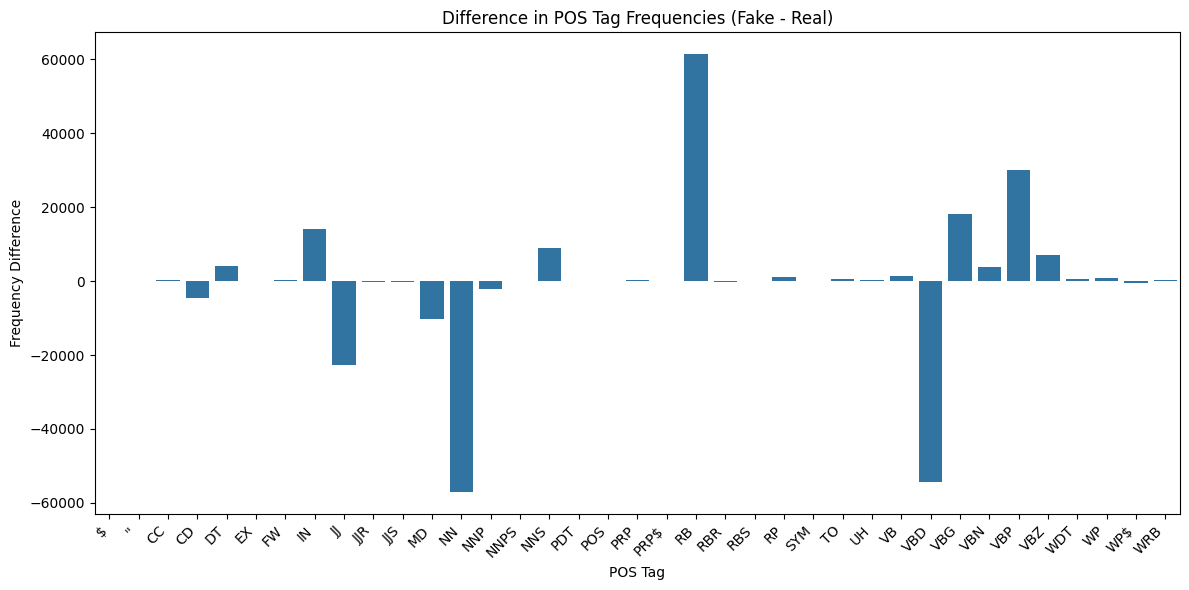

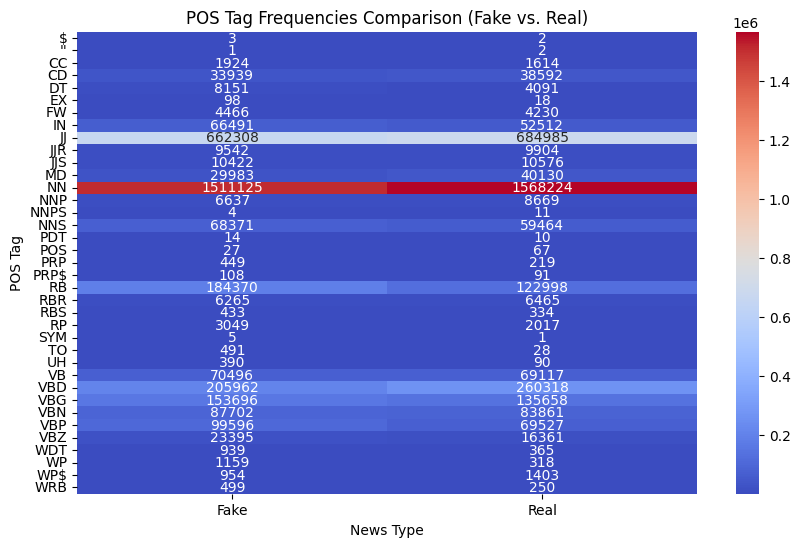

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # make sure to import pandas
import nltk # make sure to import nltk

def pos_tag_analysis_by_label(df):
    """
    Performs POS tag analysis separately for fake and real news.
    """
    nltk.download('averaged_perceptron_tagger_eng', quiet=True)

    # Group data by label
    fake_news = df[df['label'] == 0]
    real_news = df[df['label'] == 1]

    def analyze_pos_tags(news_df):
        pos_counts = {}
        for pos_list in news_df['text_pos_tags']:
            for word, pos in pos_list:
                if pos in pos_counts:
                    pos_counts[pos] += 1
                else:
                    pos_counts[pos] = 1

        return pos_counts

    # Call analyze_pos_tags here to define fake_pos and real_pos
    fake_pos = analyze_pos_tags(fake_news)
    real_pos = analyze_pos_tags(real_news)

    # Convert to DataFrames
    fake_pos_df = pd.DataFrame(list(fake_pos.items()), columns=['POS Tag', 'Fake Frequency'])
    real_pos_df = pd.DataFrame(list(real_pos.items()), columns=['POS Tag', 'Real Frequency'])

    # Merge the DataFrames
    merged_df = pd.merge(fake_pos_df, real_pos_df, on='POS Tag', how='outer').fillna(0)

    # Calculate the difference in frequencies
    merged_df['Difference'] = merged_df['Fake Frequency'] - merged_df['Real Frequency']

    # Create a bar plot for comparison
    plt.figure(figsize=(12, 6))
    sns.barplot(x='POS Tag', y='Difference', data=merged_df)
    plt.title('Difference in POS Tag Frequencies (Fake - Real)')
    plt.xlabel('POS Tag')
    plt.ylabel('Frequency Difference')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

    # Create a heatmap for comparison
    pos_tags = merged_df['POS Tag']
    frequencies = merged_df[['Fake Frequency', 'Real Frequency']]
    plt.figure(figsize=(10, 6))
    sns.heatmap(frequencies, annot=True, fmt=".0f", cmap='coolwarm', xticklabels=['Fake', 'Real'], yticklabels=pos_tags)
    plt.title('POS Tag Frequencies Comparison (Fake vs. Real)')
    plt.xlabel('News Type')
    plt.ylabel('POS Tag')
    plt.show()


# Call the function with your dataframe
pos_tag_analysis_by_label(train_df)

Exploratory Insights
Stylistic Differences:
Fake news appears more emotive and dramatic (higher use of adverbs, and less proper nouns).
Real news appears more factual and event-focused (higher verb usage and proper nouns).
This aligns with the hypothesis that fake news uses sensationalized language to capture attention, whereas real news emphasizes specifics and facts.

In [ ]:
# @title Part of Speech frequency addition to main dataframe

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import nltk

# Ensure nltk resources are downloaded (if not already)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Feature Engineering (POS Tag Frequencies)
def pos_freq_features(df):
    """
    Extracts and adds POS tag frequency features to the DataFrame.
    """
    from nltk.tokenize import word_tokenize  # Import word_tokenize here
    from nltk.corpus import stopwords  # Import stopwords here
    from nltk.stem import WordNetLemmatizer  # Import WordNetLemmatizer here

    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def process_text(text):
        words = word_tokenize(text.lower())  # Use word_tokenize
        words = [lemmatizer.lemmatize(w) for w in words if w.isalnum() and w not in stop_words]
        return words

    # Re-create the 'text_pos_tags' column if needed
    if 'text_pos_tags' not in df.columns:
        df['title_words'] = df['title'].apply(process_text)
        df['text_words'] = df['text'].apply(process_text)
        df['text_pos_tags'] = df['text_words'].apply(lambda x: nltk.pos_tag(x))  # Recalculate text_pos_tags

    pos_features = {}
    for index, row in df.iterrows():
        pos_counts = {}
        for word, pos in row['text_pos_tags']:
            pos_counts[pos] = pos_counts.get(pos, 0) + 1

        for pos, count in pos_counts.items():
            col_name = f"pos_{pos}"
            if col_name not in df.columns:
                df[col_name] = 0
            df.loc[index, col_name] = count
    return df

train_df = pos_freq_features(train_df)
test_df = pos_freq_features(test_df)

# Ensure both train and test have the same columns:
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

# Add missing columns to test_df, filled with 0s
for col in train_cols - test_cols:
    test_df[col] = 0

# Add missing columns to train_df, filled with 0s
for col in test_cols - train_cols:
    train_df[col] = 0

train_df = pos_freq_features(train_df)
test_df = pos_freq_features(test_df)

# Get all unique columns from both DataFrames
all_cols = list(set(train_df.columns) | set(test_df.columns))

# Reindex both DataFrames to ensure they have the same columns in the same order
# Fill missing values with 0
train_df = train_df.reindex(columns=all_cols, fill_value=0)
test_df = test_df.reindex(columns=all_cols, fill_value=0)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# @title Regression models for POS analysis

# Prepare data for modeling
X_train = train_df.drop(['label','title','text','date', 'title_words','text_words','title_word_freq','text_word_freq','title_most_common','text_most_common','title_pos_tags', 'text_pos_tags', 'subject'], axis=1) # Dropping 'subject', 'text_pos_tags', 'title_pos_tags', and other non-numerical columns
y_train = train_df['label']
X_test = test_df.drop(['label','title','text','date', 'title_words','text_words','title_word_freq','text_word_freq','title_most_common','text_most_common', 'title_pos_tags', 'text_pos_tags','subject'], axis=1) # Dropping 'subject', 'text_pos_tags', 'title_pos_tags', and other non-numerical columns
y_test = test_df['label']

# Handle missing values (if any)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_predictions))
print(classification_report(y_test, logreg_predictions))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9689862873253877
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3820
           1       0.96      0.98      0.97      3983

    accuracy                           0.97      7803
   macro avg       0.97      0.97      0.97      7803
weighted avg       0.97      0.97      0.97      7803


Random Forest Accuracy: 0.9739843649878251
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3820
           1       0.97      0.98      0.97      3983

    accuracy                           0.97      7803
   macro avg       0.97      0.97      0.97      7803
weighted avg       0.97      0.97      0.97      7803



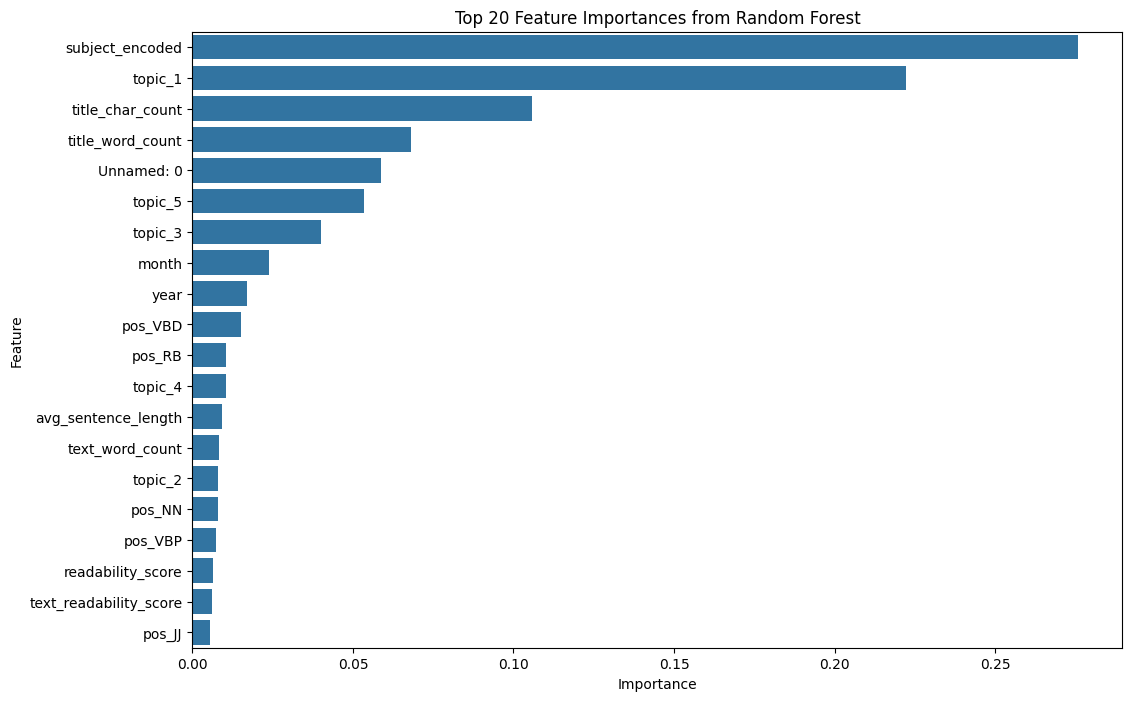

                   Feature  Importance
21         subject_encoded    0.275842
56                 topic_1    0.222131
3         title_char_count    0.105622
30        title_word_count    0.068036
7               Unnamed: 0    0.058848
50                 topic_5    0.053590
0                  topic_3    0.040044
19                   month    0.023871
4                     year    0.016852
31                 pos_VBD    0.015040
15                  pos_RB    0.010515
34                 topic_4    0.010441
12     avg_sentence_length    0.009335
47         text_word_count    0.008283
52                 topic_2    0.008002
13                  pos_NN    0.007984
5                  pos_VBP    0.007474
51       readability_score    0.006387
2   text_readability_score    0.006196
23                  pos_JJ    0.005629


In [ ]:
# @title Feature importance of Random Forest

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rf_model' is your trained RandomForestClassifier
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the top N features
top_n = 20  # Change this to display more or fewer features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
plt.title(f'Top {top_n} Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print the feature importances
print(feature_importance_df.head(top_n))

News type (subject), topic_1 from LDA, word count of both the title and texts are important features in the Random Forest model trained on Parts of Speech

In [ ]:
# @title Topic wise top words
topic_words_df = pd.DataFrame(topic_top_words).T  # Transpose for better table format
topic_words_df.columns = [f'Topic {i+1}' for i in range(len(topic_words_df.columns))]
topic_words_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,trump,said,said,trump,said
1,people,state,state,said,trump
2,like,year,north,president,republican
3,donald,government,united,court,president
4,clinton,company,military,russia,state
5,president,million,china,russian,party
6,image,law,police,state,house
7,time,federal,korea,election,tax
8,hillary,new,country,house,percent
9,said,group,government,clinton,vote


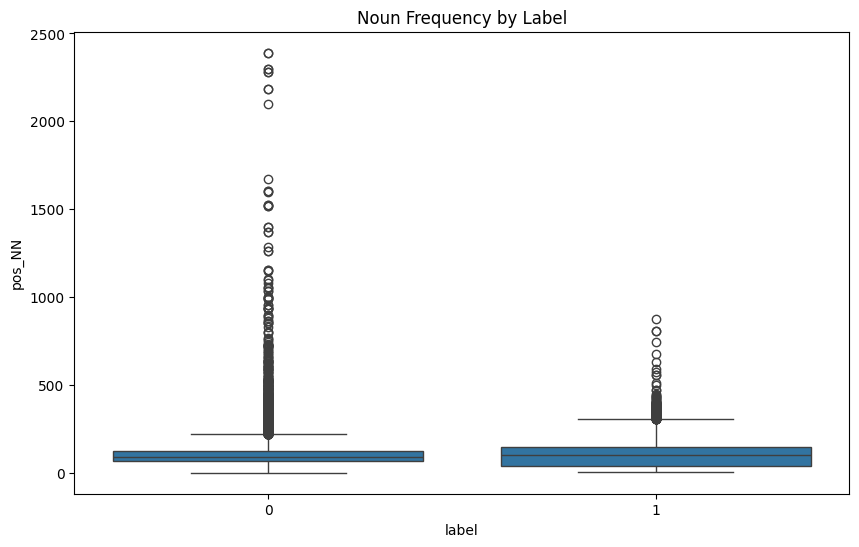

In [ ]:
# @title POS tag frequency vs. sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='pos_NN', data=train_df)  # Example: Noun frequency
plt.title('Noun Frequency by Label')
plt.show()

It can be seen that Real News uses more nouns than Fake news, with concentrated frequence where as in Fke news there are many outliers showing inconsistencies in writting style.

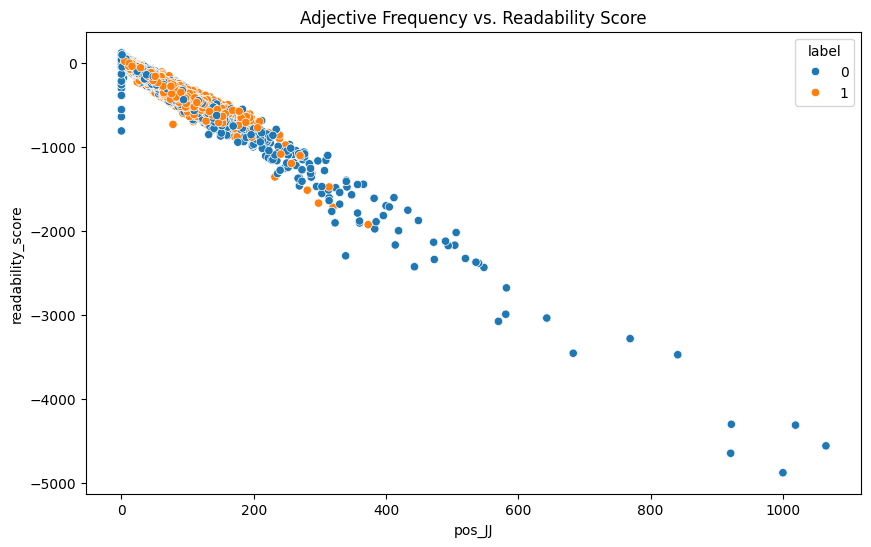

In [ ]:
# @title Relationship between specific POS tags and readability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pos_JJ', y='readability_score', hue='label', data=train_df) # Example: Adjectives vs. Readability
plt.title('Adjective Frequency vs. Readability Score')
plt.show()

Clearly, adjectives and readablitiy scores are negatively correlated for both real and fake news.

In [ ]:
# @title Advanced Classification Techniques
from sklearn.svm import SVC

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')  # Try different kernels
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print("\nSVM Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))


SVM Accuracy: 0.9541202101755735
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3820
           1       0.95      0.96      0.96      3983

    accuracy                           0.95      7803
   macro avg       0.95      0.95      0.95      7803
weighted avg       0.95      0.95      0.95      7803




Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Best Random Forest Accuracy: 0.972959118287838


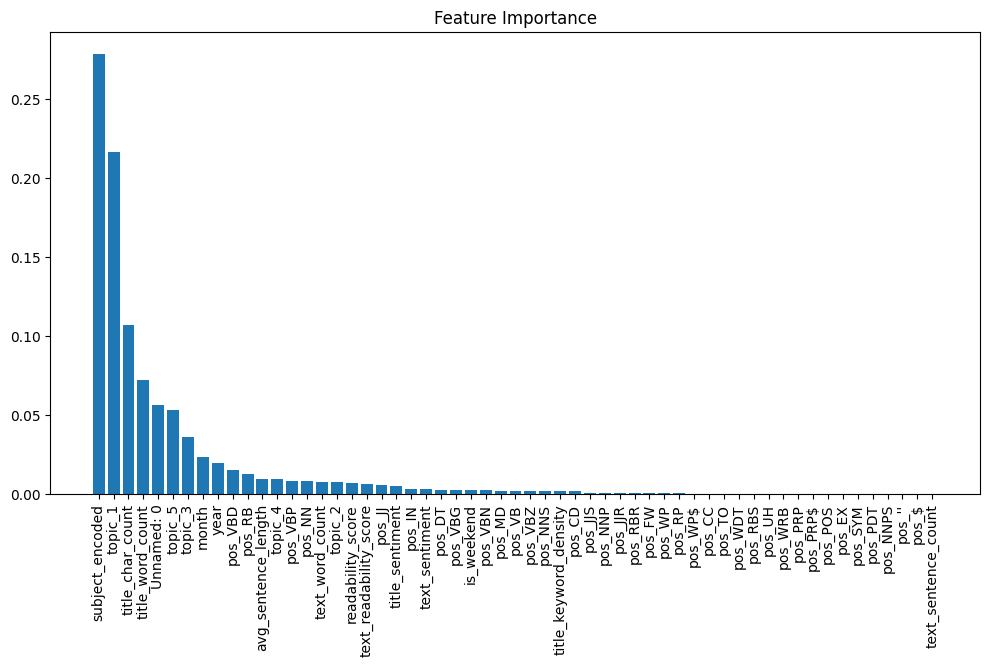

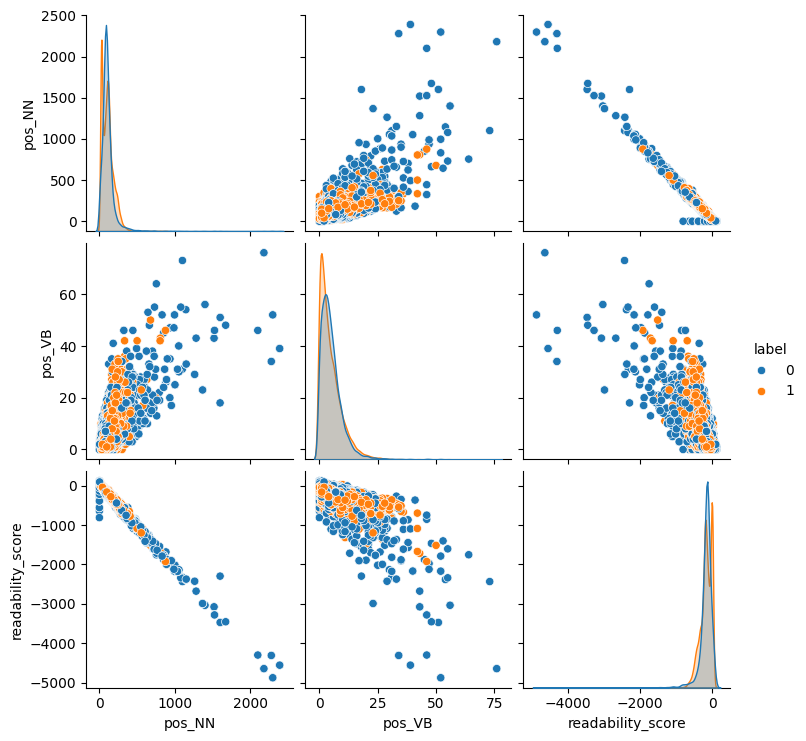

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

# Example: Tuning Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("\nBest Random Forest Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test)
print("\nBest Random Forest Accuracy:", accuracy_score(y_test, best_rf_predictions))


# Feature Importance Visualization (improved)
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()


# Explore interactions between features

# Example: Pairplot for key features
sns.pairplot(train_df[['pos_NN', 'pos_VB', 'readability_score', 'label']], hue='label')
plt.show()

In [ ]:
# Save the engineered datasets to CSV files.
train_df.to_csv('engineered_train.csv', index=False)
test_df.to_csv('engineered_test.csv', index=False)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Function to prepare TF-IDF features
def prepare_tfidf_features(df, column, max_features=5000):
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df[column])
    return tfidf_matrix, vectorizer

# Target variable and features
y_train = train_df['label'].replace('Missing', np.nan).astype(float)
y_train = y_train[np.isfinite(y_train)].astype(int)  # Filter out non-finite values before casting to int

# Ensure X_train_combined has the same number of rows as y_train
# X_train_combined = X_train_combined[np.isfinite(train_df['label'].replace('Missing', np.nan).astype(float))]

X_train_title_tfidf, title_vectorizer = prepare_tfidf_features(train_df, 'title')
X_train_text_tfidf, text_vectorizer = prepare_tfidf_features(train_df, 'text')
# Combine TF-IDF features, ensuring the same number of rows
X_train_combined = np.hstack([X_train_title_tfidf.toarray(), X_train_text_tfidf.toarray()])
X_train_combined = X_train_combined[np.isfinite(train_df['label'].replace('Missing', np.nan).astype(float))]  # Filter X_train_combined

In [ ]:
# Logistic Regression
def train_logistic_regression(X_train, y_train):
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    return model

# Logistic Regression
print("\nTraining Logistic Regression")
lr_model = train_logistic_regression(X_train_combined, y_train)


Training Logistic Regression


In [ ]:
# Random Forest
def train_random_forest(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Main Function for Model Building

# Random Forest
print("\nTraining Random Forest")
rf_model = train_random_forest(X_train_combined, y_train)


Training Random Forest


In [ ]:
# LSTM Model
def train_lstm(X_train, y_train, max_features=5000, max_len=200, embedding_dim=128, batch_size=32, epochs=5):

    X_train = X_train[y_train.index]  # Align X_train with y_train using index
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(X_train)
    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_len)

    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_len),
        tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Convert y_train to numerical values (0 or 1)
    # Replace 'Missing' with a numerical value, e.g., -1 or np.nan
    # and then convert to integers (0 or 1) with appropriate handling of missing values
    y_train = y_train.replace('Missing', -1).astype(float).astype(int)

    model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    return model, tokenizer

# Optional: Train LSTM
print("\nTraining LSTM")
lstm_model, lstm_tokenizer = train_lstm(train_df['text'], y_train)


Training LSTM
Epoch 1/5
708/708 [==============================] - 473s 663ms/step - loss: 0.1534 - accuracy: 0.9447 - val_loss: 0.1444 - val_accuracy: 0.9574
Epoch 2/5
708/708 [==============================] - 468s 661ms/step - loss: 0.1136 - accuracy: 0.9604 - val_loss: 0.1268 - val_accuracy: 0.9537
Epoch 3/5
708/708 [==============================] - 468s 662ms/step - loss: 0.0913 - accuracy: 0.9692 - val_loss: 0.1286 - val_accuracy: 0.9558
Epoch 4/5
708/708 [==============================] - 468s 662ms/step - loss: 0.0602 - accuracy: 0.9804 - val_loss: 0.0819 - val_accuracy: 0.9730
Epoch 5/5
708/708 [==============================] - 468s 662ms/step - loss: 0.0373 - accuracy: 0.9875 - val_loss: 0.0756 - val_accuracy: 0.9737


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np

def evaluate_model(y_true, y_pred, y_prob=None, model_name="Model"):
    """
    Evaluate and print metrics for a classification model.

    Parameters:
    y_true (array): True labels from the test set.
    y_pred (array): Predicted labels by the model.
    y_prob (array): Predicted probabilities for the positive class (optional for AUC-ROC).
    model_name (str): Name of the model for reporting.
    """
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    if y_prob is not None:
        print(f"AUC-ROC: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))


In [ ]:
# Prepare test data TF-IDF
X_test_title_tfidf = title_vectorizer.transform(test_df['title'])
X_test_text_tfidf = text_vectorizer.transform(test_df['text'])
X_test_combined = np.hstack([X_test_title_tfidf.toarray(), X_test_text_tfidf.toarray()])

# Get predictions
lr_predictions = lr_model.predict(X_test_combined)
lr_probabilities = lr_model.predict_proba(X_test_combined)[:, 1]

# Evaluate
evaluate_model(test_df['label'], lr_predictions, lr_probabilities, model_name="Logistic Regression")



Logistic Regression Evaluation:
Accuracy: 0.9876
Precision: 0.9848
Recall: 0.9910
F1 Score: 0.9879
AUC-ROC: 0.9992

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3820
           1       0.98      0.99      0.99      3983

    accuracy                           0.99      7803
   macro avg       0.99      0.99      0.99      7803
weighted avg       0.99      0.99      0.99      7803



In [ ]:
# Get predictions
rf_predictions = rf_model.predict(X_test_combined)
rf_probabilities = rf_model.predict_proba(X_test_combined)[:, 1]

# Evaluate
evaluate_model(test_df['label'], rf_predictions, rf_probabilities, model_name="Random Forest")



Random Forest Evaluation:
Accuracy: 0.9851
Precision: 0.9840
Recall: 0.9869
F1 Score: 0.9855
AUC-ROC: 0.9989

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3820
           1       0.98      0.99      0.99      3983

    accuracy                           0.99      7803
   macro avg       0.99      0.99      0.99      7803
weighted avg       0.99      0.99      0.99      7803



In [ ]:
# Prepare LSTM test data
max_len = 200
X_test_seq = lstm_tokenizer.texts_to_sequences(test_df['text'])  # Use tokenizer trained on train_df
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_len)

# Get predictions
lstm_probabilities = lstm_model.predict(X_test_padded).flatten()  # Output probabilities
lstm_predictions = (lstm_probabilities > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate
evaluate_model(test_df['label'], lstm_predictions, lstm_probabilities, model_name="LSTM")


244/244 [==============================] - 21s 86ms/step

LSTM Evaluation:
Accuracy: 0.9733
Precision: 0.9802
Recall: 0.9674
F1 Score: 0.9737
AUC-ROC: 0.9966

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3820
           1       0.98      0.97      0.97      3983

    accuracy                           0.97      7803
   macro avg       0.97      0.97      0.97      7803
weighted avg       0.97      0.97      0.97      7803



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test, model_name):
    """
    Plots the confusion matrix for a given model.

    Parameters:
    model: The trained classification model.
    X_test: The test data.
    y_test: The true labels for the test data.
    model_name: The name of the model (for the plot title).
    """
    # Get predictions - handle LSTM differently
    if model_name == "LSTM":
        y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert LSTM probabilities to binary predictions
    else:
        y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(models, X_test_data, y_test):
    plt.figure(figsize=(10, 6))
    for model_name, model in models.items():
        # Get the appropriate X_test data for the current model
        X_test = X_test_data.get(model_name)

        if model_name == "LSTM":
            y_pred_prob = model.predict(X_test).flatten()
        else:
            y_pred_prob = model.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for model_name, model in models.items():
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
        plt.plot(recall, precision, label=f"{model_name}")
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="best")
    plt.show()


Confusion Matrix for Logistic Regression:


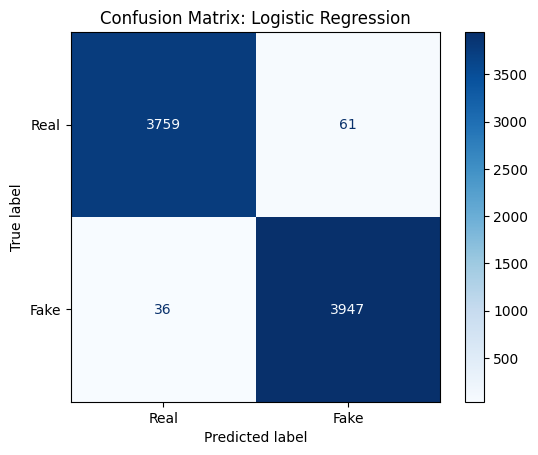

Confusion Matrix for Random Forest:


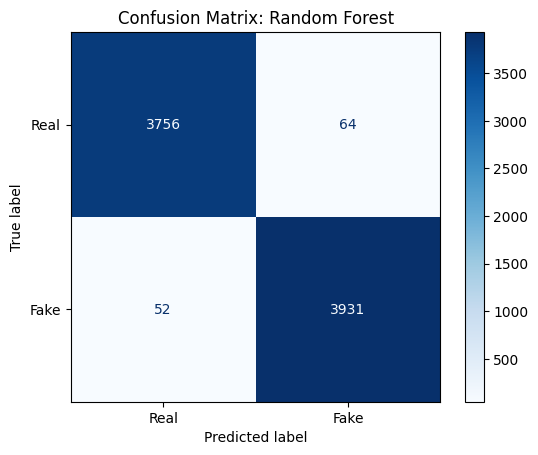

Confusion Matrix for LSTM:
244/244 [==============================] - 23s 95ms/step


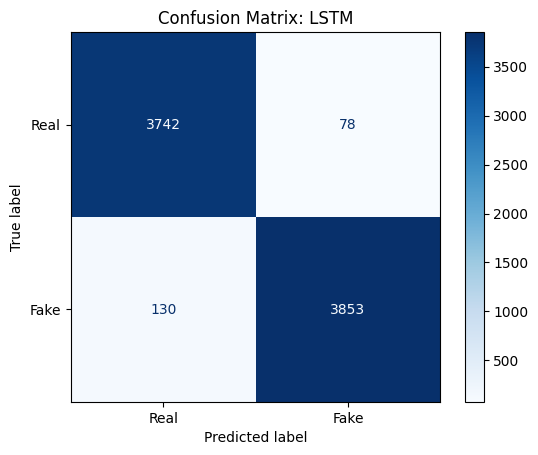

In [ ]:
models = {
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "LSTM": lstm_model
}

# Assuming y_test has 6000 samples and X_test_padded has 8267 samples
# Adjust the slicing to match the number of samples in y_test
# Define y_test using the labels from the test_df DataFrame
y_test = test_df['label'].replace('Missing', np.nan).astype(float)
y_test = y_test[np.isfinite(y_test)].astype(int)  # Filter out non-finite values before casting to int

X_test_padded_sliced = X_test_padded[:len(y_test)]

for model_name, model in models.items():
    print(f"Confusion Matrix for {model_name}:")
    if model_name == "LSTM":
        # Use the sliced padded sequences for LSTM
        plot_confusion_matrix(model, X_test_padded_sliced, y_test, model_name)
    else:
        # Use the combined TF-IDF features for other models
        plot_confusion_matrix(model, X_test_combined, y_test, model_name)

244/244 [==============================] - 22s 89ms/step


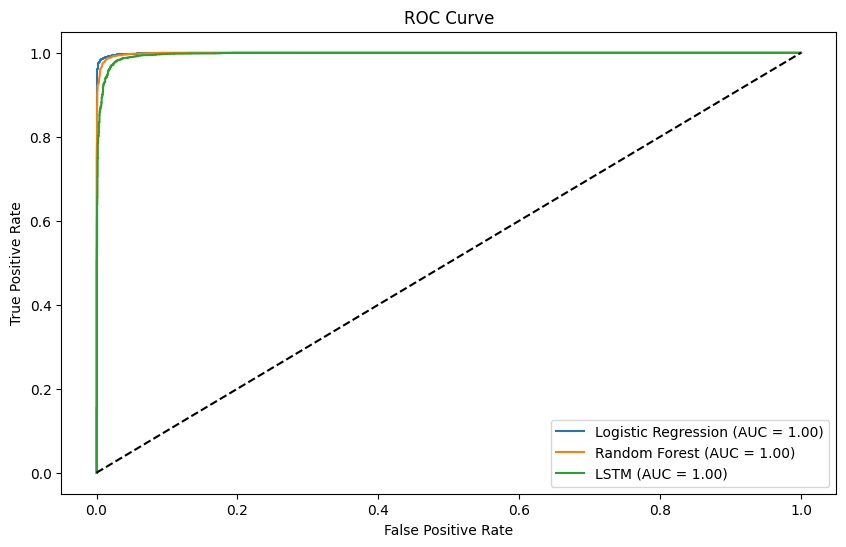

In [ ]:
plot_roc_curve(models, {"Logistic Regression": X_test_combined, "Random Forest": X_test_combined, "LSTM": X_test_padded}, test_df['label'])

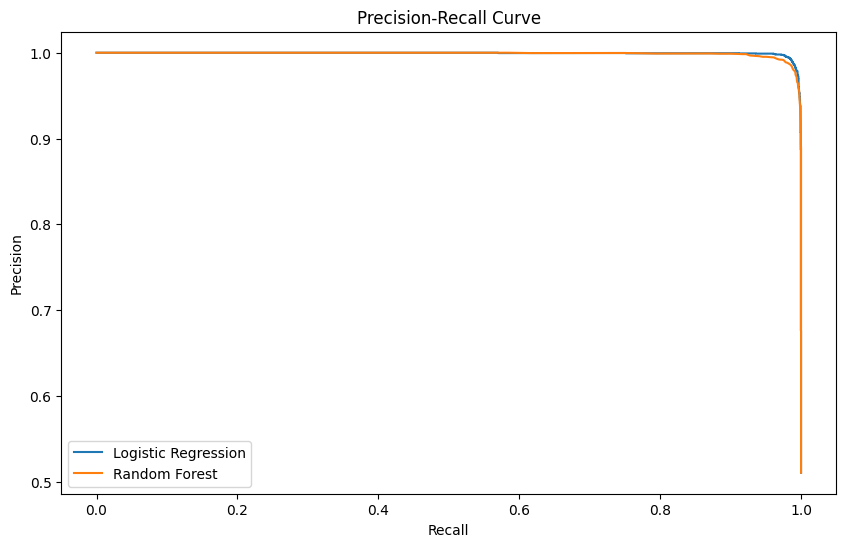

In [ ]:
# For Precision-Recall curve, it's designed for models with predict_proba
models_without_lstm = {k: v for k, v in models.items() if k != "LSTM"}
plot_precision_recall_curve(models_without_lstm, X_test_combined, y_test)

In [ ]:
# prompt: calculate R2 for the models and other econometric results of regression

from sklearn.metrics import r2_score
import numpy as np # Added import for numpy

# Assuming you have your true labels (y_test) and predictions (y_pred) for each model
# Define y_test here to make it accessible
y_test = test_df['label'].replace('Missing', np.nan).astype(float)
y_test = y_test[np.isfinite(y_test)].astype(int)  # Filter out non-finite values before casting to int


# Calculate R-squared for Logistic Regression
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Logistic Regression R-squared: {lr_r2}")

# Calculate R-squared for Random Forest
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest R-squared: {rf_r2}")

# Calculate R-squared for LSTM (if applicable, adjust based on your predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)
print(f"LSTM R-squared: {lstm_r2}")

Logistic Regression R-squared: 0.9502538274577951
Random Forest R-squared: 0.9405097318051983
LSTM R-squared: 0.8933277949610452
